<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="Case-3:-Patient-Drug-Review" data-toc-modified-id="Case-3:-Patient-Drug-Review"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case 3: Patient Drug Review</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Models-and-training" data-toc-modified-id="Models-and-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Models and training</a></span></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Case 3- Patient Drug Review
Team 16:
    1. Bellarina Chew
    2. Nik Adam Nik Joharris
    3. Valentin Dassin
Last modified: 19.03.2020<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## Background
The aim of this notebook is to learn to use neural networks in machine-learning problems to classify ratings from a collection of patient drug reviews extracted from Drugs.com.

## Data
The dataset used is a  a collection of patient drug reviews extracted from Drugs.com. Drugs.com is a comprehensive source of drug information online.

In [1]:
# Import necessary module
%pylab inline
import time # for timing
import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf
import os

# Import sklearn specific
from sklearn.model_selection import train_test_split # preprocessing datasets
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score # final metrics

# Import keras specific
from tensorflow.keras.preprocessing.text import Tokenizer # text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences # text preprocessing
from tensorflow.keras.models import Sequential # modeling neural networks
from tensorflow.keras.layers import Dense, Activation # layers for neural networks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant


Populating the interactive namespace from numpy and matplotlib


#### Load train and test files

In [2]:
# Data files can be found here
print('Data files can be found here: ', os.listdir("C:/Users/Adam/Desktop/Metropolia UAS/Neural Networks/Data"))
# Change the default figure size
plt.rcParams['figure.figsize'] = [12, 5]

# Create dataframes train and test
train = pd.read_csv("C:/Users/Adam/Desktop/Metropolia UAS/Neural Networks/Data/kuc-hackathon-winter-2018/drugsComTrain_raw.csv")
test = pd.read_csv("C:/Users/Adam/Desktop/Metropolia UAS/Neural Networks/Data/kuc-hackathon-winter-2018/drugsComTest_raw.csv")

# Drop empty comments
train = train.dropna()
test = test.dropna()

# Show the first 5 rows of the train set
print('The first 5 rows of the training data:')
train.head()

Data files can be found here:  ['ChestXRay2017', 'ChestXRay2017.zip', 'heart-disease.names', 'kuc-hackathon-winter-2018', 'kuc-hackathon-winter-2018.zip', 'processed.cleveland.data']
The first 5 rows of the training data:


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


### Text processing
#### Tokenize the text
Tokenization simply divides a sentence into a list of words. Keras tokenizer function tokenizes the strings and the used another important function ‘texts_to_sequences’ to make sequences of words. Then, truncate and pad the input sequences so that they are all in the same length for modeling.

In [3]:
#Extract the review and rating column
train_samples = train['review'].values.tolist()
train_labels = train['rating'].values
test_samples = test['review'].values.tolist()
test_labels = test['rating'].values

# Tokenize text
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_samples)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_samples)
test_sequences = tokenizer.texts_to_sequences(test_samples)
train_data = pad_sequences(train_sequences, maxlen=200)
test_data = pad_sequences(test_sequences, maxlen=200)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 51382 unique tokens.


#### Convert ratings into classes
Since the main idea is to identify comments according to the ratings. For simplicity, comments will be labelled into 3 different classes: “negative (0)” (rating < 5), “neutral (1)” (rating 5 or 6) and “positive (2)” (rating > 6)

In [4]:
# label classes for training data
for i in range(len(train_labels)):
    x = train_labels[i]
    if x == 5 or x==6:
        train_labels[i] = 1
    elif x >= 7:
        train_labels[i] = 2
    else:
        train_labels[i] = 0
        
# label classes for test data
for i in range(len(test_labels)):
    x = test_labels[i]
    if x == 5 or x==6:
        test_labels[i] = 1
    elif x >= 7:
        test_labels[i] = 2
    else:
        test_labels[i] = 0

#print training data and label tensor
train_labels = to_categorical(np.asarray(train_labels))
print('Shape of train data tensor:', train_data.shape)
print('Shape of train label tensor:', train_labels.shape)

#print test data and label tensor
test_labels = to_categorical(np.asarray(test_labels))
print('Shape of test data tensor:', test_data.shape)
print('Shape of test label tensor:', test_labels.shape)

Shape of train data tensor: (160398, 200)
Shape of train label tensor: (160398, 3)
Shape of test data tensor: (53471, 200)
Shape of test label tensor: (53471, 3)


#### Separation of data into training and validation set
We will also split the <b>training data</b> into training and validation sets where :
- Training data = 75%
- Validation data = 25%

In [5]:
VALIDATION_SPLIT = 0.25

# split the data into training and validation set
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)
train_data = train_data[indices]
train_labels = train_labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * train_data.shape[0])

x_train = train_data[:-nb_validation_samples]
y_train = train_labels[:-nb_validation_samples]
x_val = train_data[-nb_validation_samples:]
y_val = train_labels[-nb_validation_samples:]

## Models and training
we will now create a simple neural network classifier using LSTM inspired by to Li, S. (2019). The network starts with an embedding layer. 
- The layer takes 5000 as the first argument (which is the size of our vocabulary) and 100 as the second input parameter (which is the dimension of the embedding). The third parameter is the input_length of 200, which is the length of each comment sequence.
- SpatialDropout1D performs variational dropout in NLP models.
- The next layer is the LSTM layer with 100 memory units.
- The output layer must create 5 output values, one for each class.
- Activation function is softmax for multi-class classification.
- Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

In [6]:
#build model
model = Sequential()
model.add(Embedding(5000, 100, input_length=200))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))

#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          500000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 580,703
Trainable params: 580,703
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [7]:
%%time
history = model.fit(x_train, y_train,
          batch_size=256,
          epochs=5,
          verbose = 0,
          validation_data=(x_val, y_val))

Wall time: 31min 32s


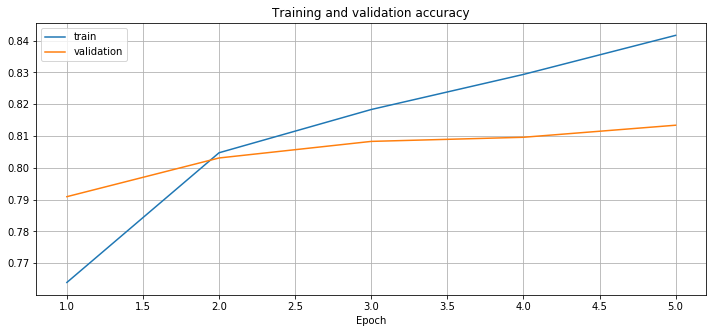

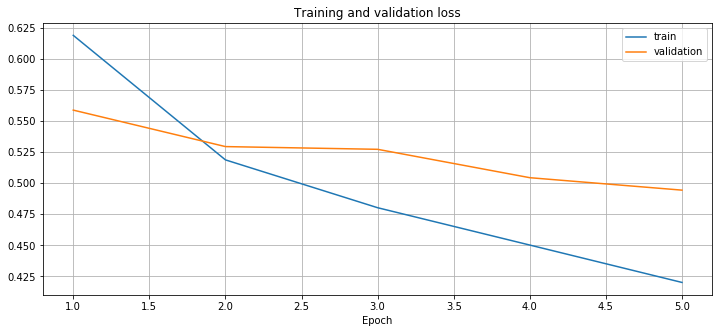

In [8]:
# Plot the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
e = arange(len(acc)) + 1

plot(e, acc, label = 'train')
plot(e, val_acc, label = 'validation')
title('Training and validation accuracy')
xlabel('Epoch')
grid()
legend()

figure()

plot(e, loss, label = 'train')
plot(e, val_loss, label = 'validation')
title('Training and validation loss')
xlabel('Epoch')
grid()
legend()

show()

### Evaluate the model

In [9]:
# Find the predicted values for the test set
y_pred = argmax(model.predict(x_val), axis = 1)
y_true = argmax(y_val, axis = 1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred).T
print('Confusion matrix:')
print(cm)

# Calculate the classification report
cr = classification_report(y_true, y_pred)
print('Classification report:')
print(cr)

Confusion matrix:
[[ 7483  1239  1411]
 [  281   357   342]
 [ 2174  2036 24776]]
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      9938
           1       0.36      0.10      0.15      3632
           2       0.85      0.93      0.89     26529

    accuracy                           0.81     40099
   macro avg       0.65      0.60      0.60     40099
weighted avg       0.78      0.81      0.79     40099



In [10]:
# Calculate the cohen's kappa, both with linear and quadratic weights
k = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's kappa (linear)    = {k:.3f}")
k2 = cohen_kappa_score(y_true, y_pred, weights = 'quadratic')
print(f"Cohen's kappa (quadratic) = {k2:.3f}")

Cohen's kappa (linear)    = 0.592
Cohen's kappa (quadratic) = 0.696


## Results and Discussion
Lets use various metrics to gain insights of the model's performance. 

In [11]:
model.evaluate(test_data, test_labels, verbose=0)

[0.49063510794094806, 0.8167044]

In [12]:
pred_tensor = model.predict(test_data) 


for imnum in range(len(test_data)):
    predicted = np.argmax(pred_tensor[imnum])
    true = np.argmax(test_labels[imnum])
    if (predicted != true):
        break

print("Test sample",imnum,": predicted",predicted,"true",true)

Test sample 5 : predicted 2 true 0


## Conclusion

## Reference
1. Li, S. (2019, April 10). Multi-Class Text Classification with LSTM. Retrieved from https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17